In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import acquire
import env

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [2]:
def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [3]:
# read the data into df
df = get_mallcustomer_data()

First I am going to run through the lesson examples, I'll insert a break after that when I start the exercises.

In [4]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Using this lesson as a guide, perform clustering on the iris dataset.

Choose features -- age and annual income
Visualize the results of your clustering. --
Use the elbow method to visually select a good value for k.--5
Repeat the clustering, this time with 3 different features.

df.age and df.annual_income

In [5]:
# choosing my features
X = df[['age', 'annual_income']]

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>]], dtype=object)

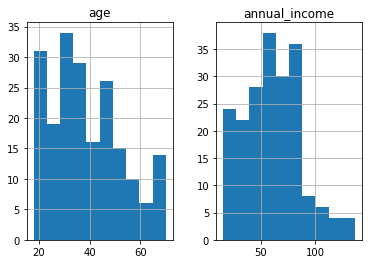

In [6]:
# look at distribution of sepal length and petal_length

X.hist()

In [7]:
# Scale the X
# create and fit 
scaler = MinMaxScaler().fit(X)
# use it
X_scaled = pd.DataFrame(
    scaler.transform(X),
    columns= X.columns).set_index([X.index.values])

In [8]:
# look at the head
X_scaled.head()

,age,annual_income
1,0.019231,0.000000
2,0.057692,0.000000
3,0.038462,0.008197
4,0.096154,0.008197
5,0.250000,0.016393


In [9]:
# sklearn implementation of KMeans

#define it
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit it
kmeans.fit(X_scaled)

# Use/predict it
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [10]:
# make a new column named cluster in df and X_scaled dataframe
df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [11]:
X_scaled.head()

,age,annual_income,cluster
1,0.019231,0.000000,2
2,0.057692,0.000000,2
3,0.038462,0.008197,2
4,0.096154,0.008197,2
5,0.250000,0.016393,2


In [12]:
# look at sample of the df

df.sample(20)

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
57,Female,51,44,50,0
14,Female,24,20,77,2
166,Female,36,85,75,1
66,Male,18,48,59,2
78,Male,40,54,48,1
195,Female,47,120,16,1
25,Female,54,28,14,0
194,Female,38,113,91,1
84,Female,46,54,44,0


In [13]:
df.groupby('cluster')

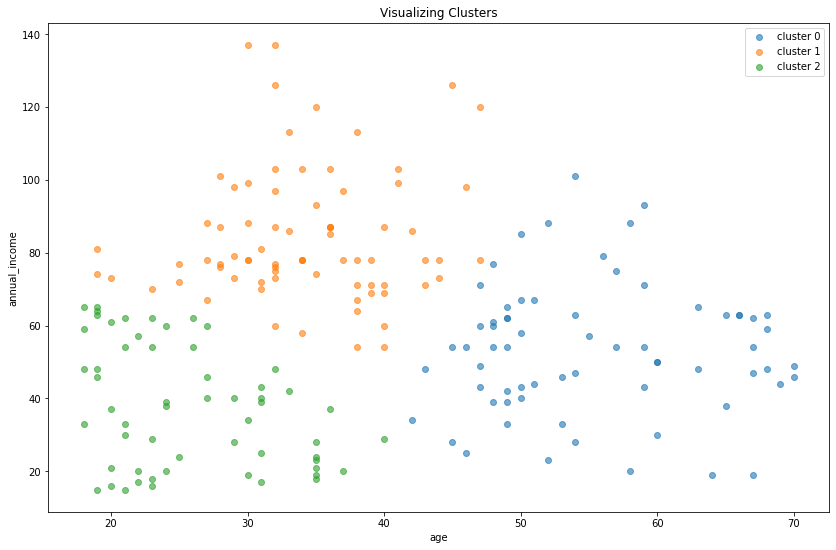

In [14]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Clusters')
plt.show()



In [15]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[0.71756602, 0.3126988 ],
       [0.31098178, 0.56794651],
       [0.14878543, 0.18550475]])

In [16]:
#first I'll try it on scaled data
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [17]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X_scaled.columns)
centroids_scaled

,age,annual_income,cluster
0,0.717566,0.312699,-1.221245e-15
1,0.148785,0.185505,2.000000e+00
2,0.310982,0.567947,1.000000e+00


In [18]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 0.71756602,  0.3126988 , -0.        ],
       [ 0.14878543,  0.18550475,  2.        ],
       [ 0.31098178,  0.56794651,  1.        ]])

In [19]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X_scaled.columns)
centroids_scaled

,age,annual_income,cluster
0,0.717566,0.312699,-1.221245e-15
1,0.148785,0.185505,2.000000e+00
2,0.310982,0.567947,1.000000e+00


In [20]:
df.groupby('cluster')['age', 'annual_income'].mean()

,age,annual_income
cluster,,
0,55.313433,53.149254
1,34.171053,84.289474
2,25.736842,37.631579


In [21]:
# Centriods for unscaled data?
centroids = df.groupby('cluster')['age', 'annual_income'].mean()
centroids

,age,annual_income
cluster,,
0,55.313433,53.149254
1,34.171053,84.289474
2,25.736842,37.631579


In [23]:
# Another way to get unscaled centroids?

#scaler.inverse_transform(kmeans.cluster_centers_)

Text(0.5, 1.0, 'Visualizing Cluster Centers')

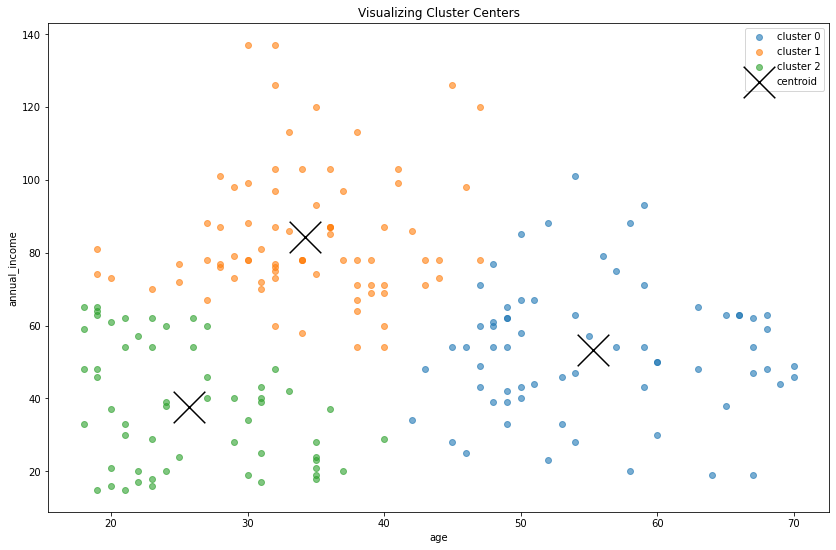

In [24]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

In [25]:
## mini exercise time

In [26]:
# Let's take a look at k = 2 clusters.

# make the thing
kmeans = KMeans(n_clusters=2, random_state=1349)
# fit the thing (on scaled data!)
kmeans.fit(X_scaled)
# predict on scaled also
X_scaled['cluster'] = kmeans.predict(X_scaled)

<AxesSubplot:xlabel='annual_income', ylabel='age'>

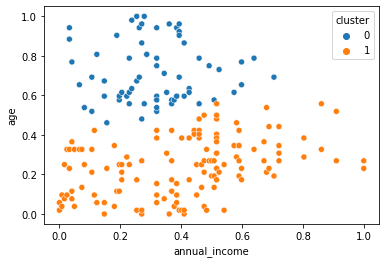

In [27]:
sns.scatterplot(x='annual_income', y='age', data=X_scaled, hue='cluster')

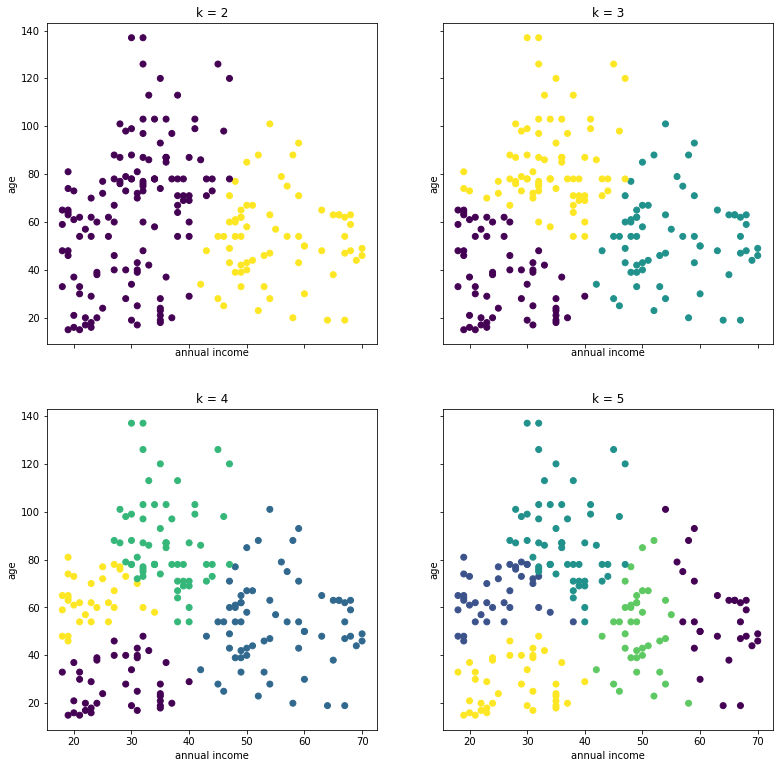

In [28]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.age, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='age')

In [29]:
################### my own experimentation

In [30]:
# Scale the X
# create and fit 
scaler = MinMaxScaler().fit(X)
# use it
X_scaled = pd.DataFrame(
    scaler.transform(X),
    columns= X.columns).set_index([X.index.values])

In [31]:
# create, fit and predict on features
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 2,
       0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [32]:
df['cluster'] = kmeans.predict(X_scaled)

In [33]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)
centroids

,age,annual_income
0,0.310982,0.567947
1,0.717566,0.312699
2,0.148785,0.185505


Text(0.5, 1.0, 'Visualizing Cluster Centers')

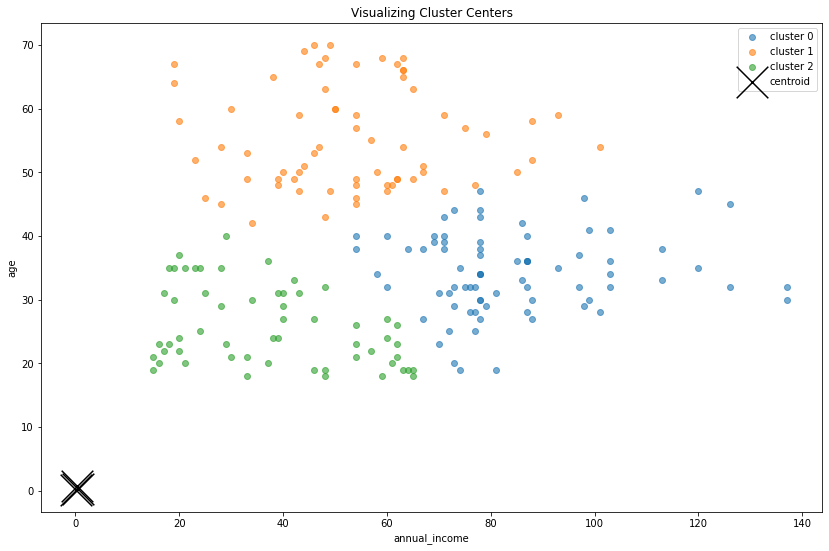

In [34]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.annual_income, subset.age, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='age', x='annual_income', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

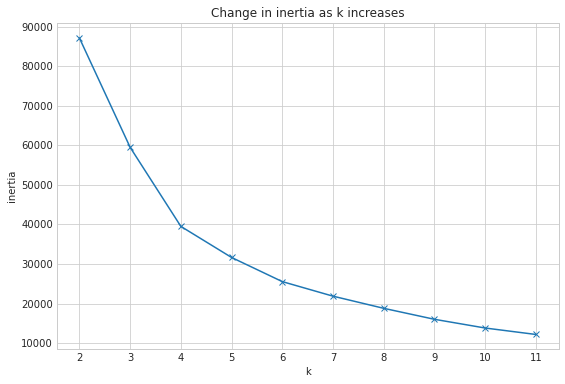

In [35]:
#this should let me visualize the elbow
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [36]:
# so I would say the elbow is at 5

In [37]:
# and now I will rerun this with the above k
# create, fit and predict on features
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [38]:
df['cluster'] = kmeans.predict(X)

In [39]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,56.620000,48.480000
1,38.258621,78.155172
2,25.064516,59.483871
3,36.600000,109.700000
4,29.536585,27.243902


Text(0.5, 1.0, 'Visualizing Cluster Centers')

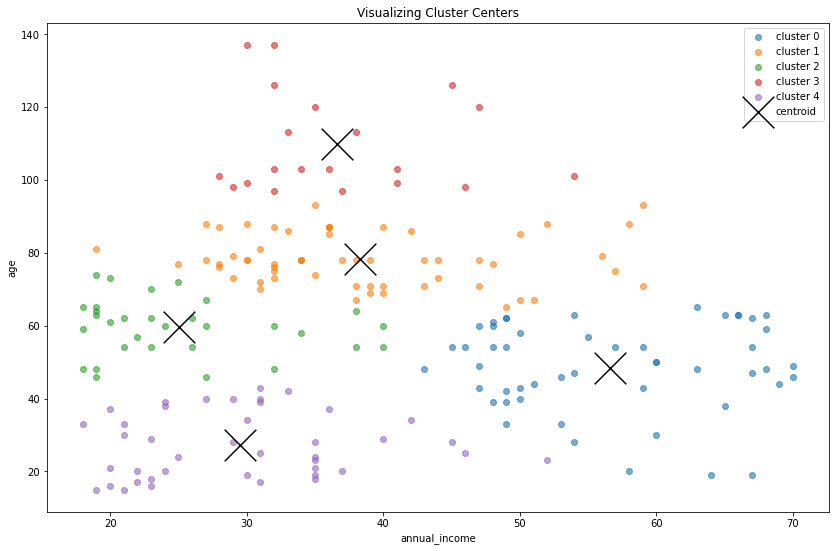

In [40]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('age')
plt.title('Visualizing Cluster Centers')

In [41]:
# that's not optimal so I will look for a better k values, let's try 4
# create, fit and predict on features
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [42]:
df['cluster'] = kmeans.predict(X)

In [43]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,29.446809,29.212766
1,31.958904,72.958904
2,39.000000,106.500000
3,55.660714,51.017857


Text(0.5, 1.0, 'Visualizing Cluster Centers')

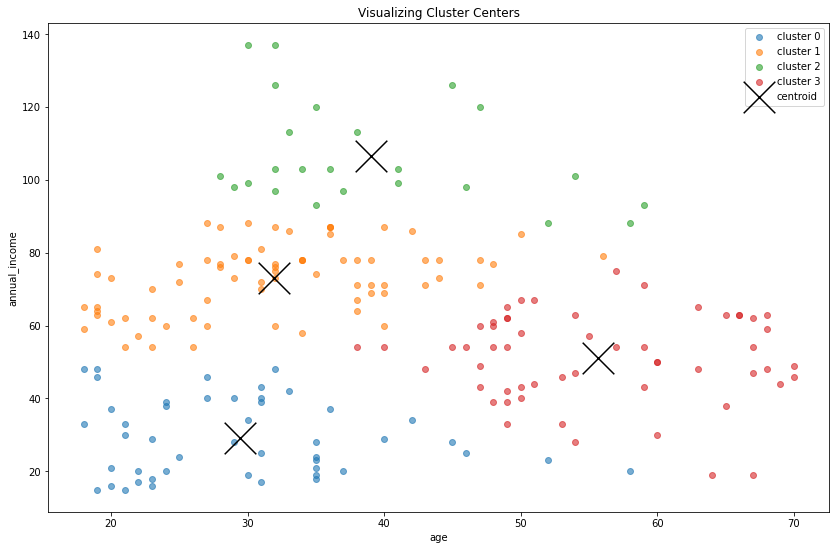

In [44]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

In [45]:
# this doesn't look much better so I'll try 2 now
# create, fit and predict on features
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [46]:
df['cluster'] = kmeans.predict(X)

In [47]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,age,annual_income
0,42.219048,40.780952
1,35.126316,82.421053


Text(0.5, 1.0, 'Visualizing Cluster Centers')

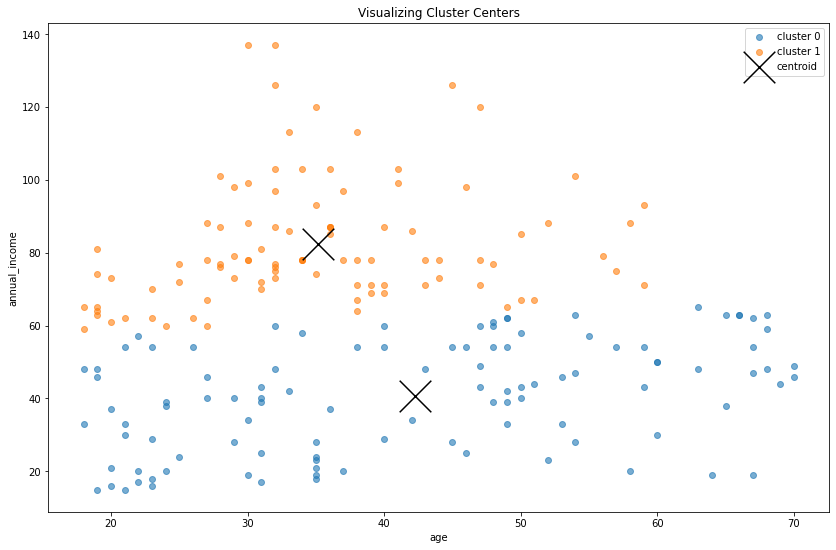

In [48]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

In [49]:
# still no better results let's go to the other extreme and use a k of 9
# now I'm going to try this a different way since the bottom right centroid above doesn't want to play nice
kmeans = KMeans(n_clusters=9)
kmeans.fit(X)

kmeans.predict(X)

kmeans.cluster_centers_

centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

centroids = df.groupby('cluster')['annual_income', 'age'].mean()
centroids

,annual_income,age
cluster,,
0,40.780952,42.219048
1,82.421053,35.126316


Text(0.5, 1.0, 'Visualizing Cluster Centers')

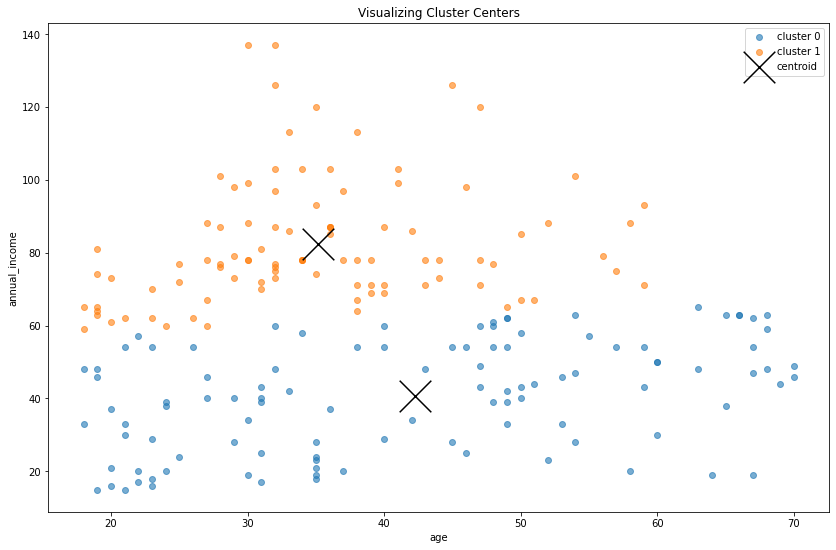

In [50]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='annual_income', x='age', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('age')
plt.ylabel('annual_income')
plt.title('Visualizing Cluster Centers')

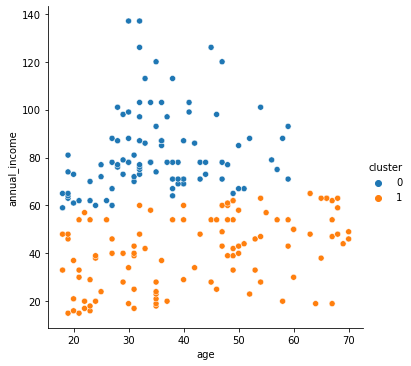

In [51]:
# let's try the example straight out of the lesson k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

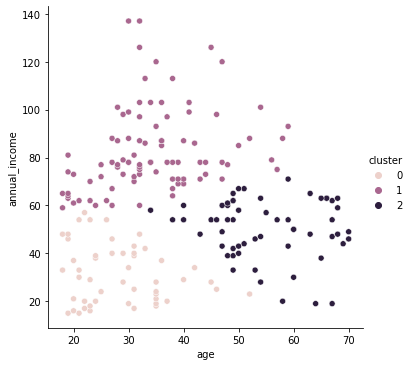

In [52]:
# let's try the example straight out of the lesson k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

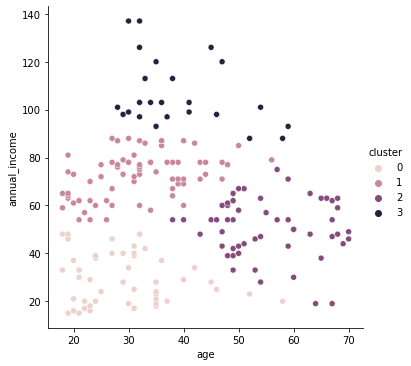

In [53]:
# let's try the example straight out of the lesson k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

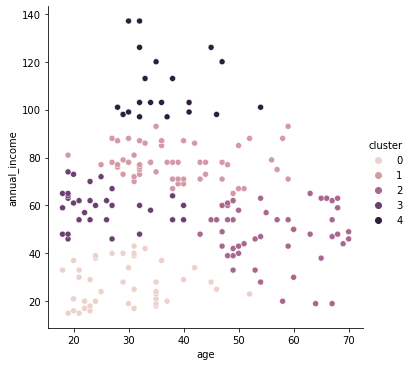

In [54]:
# let's try the example straight out of the lesson k=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

How does scaling impact the results of clustering?
-It makes each unit measurement equal so that the distances won't be distorted due to larger numbers in a different measurement, so pretty much it makes the unit measurements have equal weight.

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [55]:
# I am going to keep using mall customers to compare scaled and unscaled data 

In [56]:
df.head()

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,0
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [ ]:
# now the features I want to use are spending_score and annual_income

In [57]:
# define independent variables for k-means

X = df[['spending_score', 'annual_income']]

In [58]:
X.head()

,spending_score,annual_income
customer_id,,
1,39,15
2,81,15
3,6,16
4,77,16
5,40,17


array([[<AxesSubplot:title={'center':'spending_score'}>,
        <AxesSubplot:title={'center':'annual_income'}>]], dtype=object)

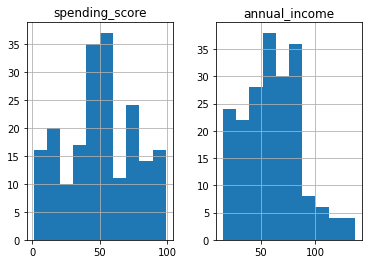

In [59]:
# look at distribution of my features

X.hist()

In [60]:
# Scale the X
# make our thing, fit our thing
scaler = MinMaxScaler().fit(X)
# use the thing
X_scaled = pd.DataFrame(
    scaler.transform(X),
    columns= X.columns).set_index([X.index.values])

In [61]:
X.head()

,spending_score,annual_income
customer_id,,
1,39,15
2,81,15
3,6,16
4,77,16
5,40,17


In [62]:
# look at the head
X_scaled.head()

,spending_score,annual_income
1,0.387755,0.000000
2,0.816327,0.000000
3,0.051020,0.008197
4,0.775510,0.008197
5,0.397959,0.016393


In [63]:
# first I am going to cluster on scaled data
# sklearn implementation of KMeans

#define the thing
kmeans_scaled = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans_scaled.fit(X_scaled)

# Use (predict using) the thing 
kmeans_scaled.predict(X_scaled)

array([2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [64]:
# and at the same time I will cluster on unscaled data
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state=1349)

# fit the thing
kmeans.fit(X)

# Use (predict using) the thing 
kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [65]:
# make a new column names cluster in iris and X_scaled dataframe and X dataframe
cluster_features = ['spending_score', 'annual_income']
X['cluster'] = kmeans.predict(X[cluster_features])

X['scaled_cluster'] = kmeans_scaled.predict(X_scaled[cluster_features])

X_scaled['cluster'] = kmeans.predict(X[cluster_features])

X_scaled['scaled_cluster'] = kmeans_scaled.predict(X_scaled[cluster_features])

In [66]:
# taking a peek at the unscaled data
X.head()

,spending_score,annual_income,cluster,scaled_cluster
customer_id,,,,
1,39,15,2,2
2,81,15,2,2
3,6,16,2,0
4,77,16,2,2
5,40,17,2,2


In [73]:
centroids = X_scaled.groupby('cluster')['annual_income', 'spending_score'].mean()

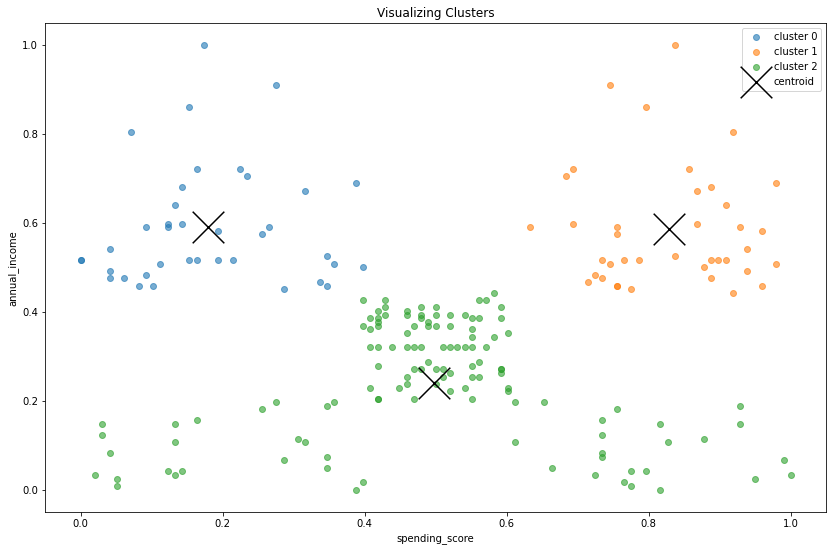

In [74]:
# now I am going to plot the scaled features
plt.figure(figsize=(14, 9))

for cluster, subset in X_scaled.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.annual_income, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
centroids.plot.scatter(y='annual_income', x='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')


plt.legend()
plt.xlabel('spending_score')
plt.ylabel('annual_income')
plt.title('Visualizing Clusters')
plt.show()



In [75]:
centroids = X.groupby('cluster')['annual_income', 'spending_score'].mean()

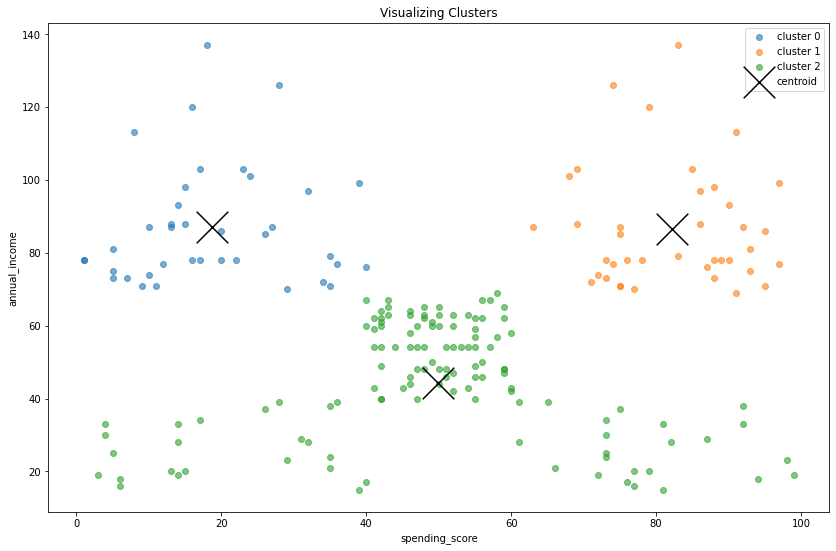

In [76]:
# now I am going to plot the scaled features
plt.figure(figsize=(14, 9))

for cluster, subset in X.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.annual_income, label='cluster ' + str(cluster), alpha=.6, cmap='reds')
centroids.plot.scatter(y='annual_income', x='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')


plt.legend()
plt.xlabel('spending_score')
plt.ylabel('annual_income')
plt.title('Visualizing Clusters')
plt.show()

